In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [33]:
import pandas as pd

file_path = r'C:\Users\LocalAdmin\Downloads\17-22&6x6PCBs-03Jan2025.dat'

try:
    # Assuming data is in a structured format like CSV or similar
    df = pd.read_csv(file_path, sep=',')
except FileNotFoundError:
    pass

In [41]:
cols

['freq[Hz]',
 're:Trc1_S21',
 'im:Trc1_S21',
 're:Mem2[Trc1]_S21',
 'im:Mem2[Trc1]_S21',
 're:Mem3[Trc1]_S21',
 'im:Mem3[Trc1]_S21',
 're:Mem4[Trc1]_S21',
 'im:Mem4[Trc1]_S21',
 're:Mem5[Trc1]_S21',
 'im:Mem5[Trc1]_S21',
 're:Mem6[Trc1]_S21',
 'im:Mem6[Trc1]_S21',
 're:Mem7[Trc1]_S21',
 'im:Mem7[Trc1]_S21',
 're:Mem8[Trc1]_S21',
 'im:Mem8[Trc1]_S21',
 're:Mem9[Trc1]_S21',
 'im:Mem9[Trc1]_S21',
 're:Mem10[Trc1]_S21',
 'im:Mem10[Trc1]_S21',
 're:Mem11[Trc1]_S21',
 'im:Mem11[Trc1]_S21',
 're:Mem12[Trc1]_S21',
 'im:Mem12[Trc1]_S21',
 're:Mem13[Trc1]_S21',
 'im:Mem13[Trc1]_S21',
 'Unnamed: 27']

In [45]:
cols = list(df.columns)
df[cols[0]].to_numpy()

array([3.00000e+09, 3.00025e+09, 3.00050e+09, ..., 7.99950e+09,
       7.99975e+09, 8.00000e+09])

In [49]:
cols = list(df.columns)
d = {}
for i,c in enumerate(cols):
    if i == 0:
        d['freq'] = df[c].to_numpy()*1e-9
    if i>2 and i%2 == 1 and i<len(cols)-1:
        d[f'S21_{i//2}'] = df[c].to_numpy() + 1j*df[cols[i+1]].to_numpy()
    

In [62]:
names = ['16-18', '13-14', '12-15', '19-28', '23-27', '5-7', '4-8', '10-30', '1-31', 'RF', 'Bias-tee 1', 'Bias-tee 2']

Text(0.5, 1.0, '17-22 PCB')

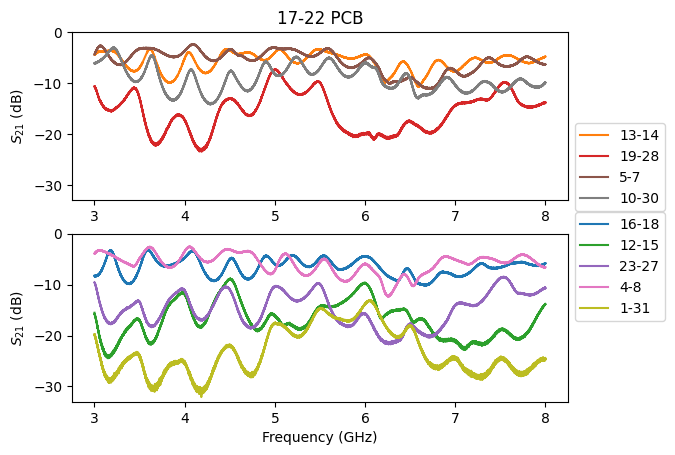

In [88]:
# Plotting
fig, ax = plt.subplots(2,1)
for i in range(1, len(cols)//2-4):
    color = 'C'+str(i-1)
    ax[i%2].plot(d['freq'], 20*np.log10(np.abs(d[f'S21_{i}'])), label=f'{names[i-1]}', color=color)

ax[1].set_xlabel('Frequency (GHz)')
ax[1].set_ylabel('$S_{21}$ (dB)')
ax[0].set_ylabel('$S_{21}$ (dB)')
ax[0].set_ylim([-33, 0])
ax[1].set_ylim([-33, 0])

ax[0].legend(bbox_to_anchor=(1.21, 0.5))
ax[1].legend(bbox_to_anchor=(1, 1.17))
ax[0].set_title('17-22 PCB')


Text(0.5, 1.0, '20-016-B cQED 6x6 PCB')

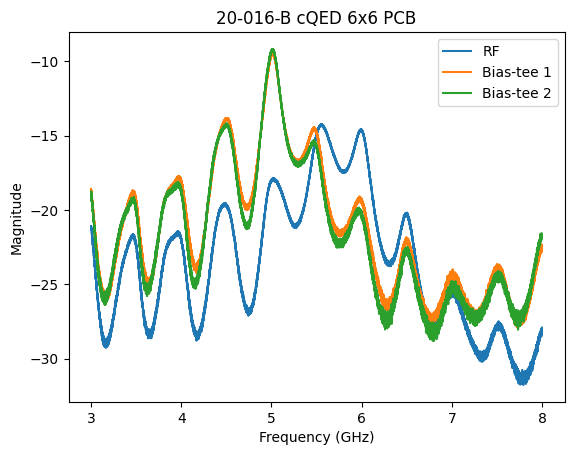

In [63]:
# Plotting
fig, ax = plt.subplots()
for i in range(len(cols)//2-4, len(cols)//2-1):
    ax.plot(d['freq'], 20*np.log10(np.abs(d[f'S21_{i}'])), label=f'{names[i-1]}')
ax.set_xlabel('Frequency (GHz)')
ax.set_ylabel('Magnitude')
ax.legend()
ax.set_title('20-016-B cQED 6x6 PCB')